In [83]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.explain as explain

In [84]:
nodes = [
    {'name': 'kernelEvictingKubeletProcess', 'children': ['kubeletProcessRestarting'], 'cpt': [0.3, 0.7]},
    {'name': 'hostMachineRestarting', 'children': ['kubeletProcessRestarting'], 'cpt': [0.8, 0.2]}, 
    {'name': 'networkLatencyHigh', 'children': ['kubeletHttpExceedingDeadline'], 'cpt': [0.2, 0.8]},
    {'name': 'kubeletProcessDeadlocking', 'children': ['kubeletNotResponding'], 'cpt': [0.5, 0.5]},
    {'name': 'kubeletProcessRestarting', 'children': ['kubeletNotResponding']},
    {'name': 'kubeletNotResponding', 'children': ['kubeletUnhealthy']},
    {'name': 'kubeletHttpExceedingDeadline', 'children': ['kubeletUnhealthy']},
    {'name': 'nodePIDPressure', 'children': ['nodeNotReady'], 'cpt': [0.1, 0.9]},
    {'name': 'nodeMemoryPressure', 'children': ['nodeNotReady'], 'cpt': [0.4, 0.6]},
    {'name': 'nodeDiskPressure', 'children': ['nodeNotReady'], 'cpt': [0.8, 0.2]},
    {'name': 'kubeletUnhealthy', 'children': ['nodeNotReady']},
    {'name': 'nodeNetworkUnavaiable', 'children': ['nodeNotReady'], 'cpt': [0.9, 0.1]},
    {'name': 'nodeNotReady'},
]
def populate_bn(bn, nodes):
    processed = []
    nid = 1
    for node in nodes:
        name = node['name']
        if name not in processed:
            bn.add(gum.LabelizedVariable(name, name), nid)
            processed.append(name)
        children = node.get('children', [])
        if children is None:
            continue
        for child in children:
            nid += 1
            if child not in processed:
                bn.add(gum.LabelizedVariable(child, child), nid)
                processed.append(child)
            bn.addArc(name, child)
        nid += 1

bn = gum.BayesNet('nodeNotReady')
populate_bn(bn, nodes)
bn.generateCPTs()

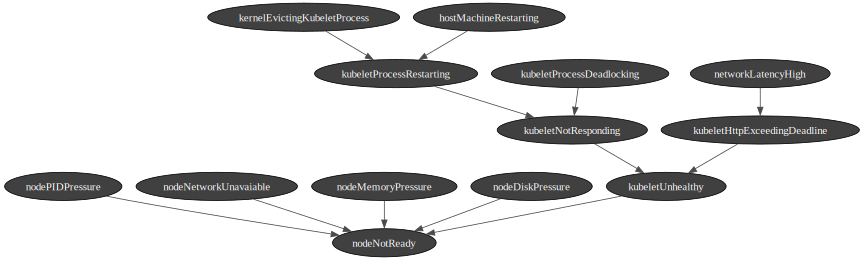

In [96]:
gnb.showBN(dag, size=12)

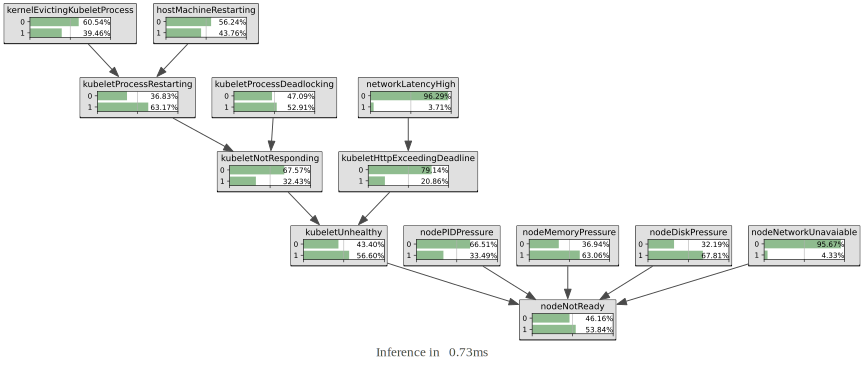

In [95]:
gnb.showInference(bn, size=12)

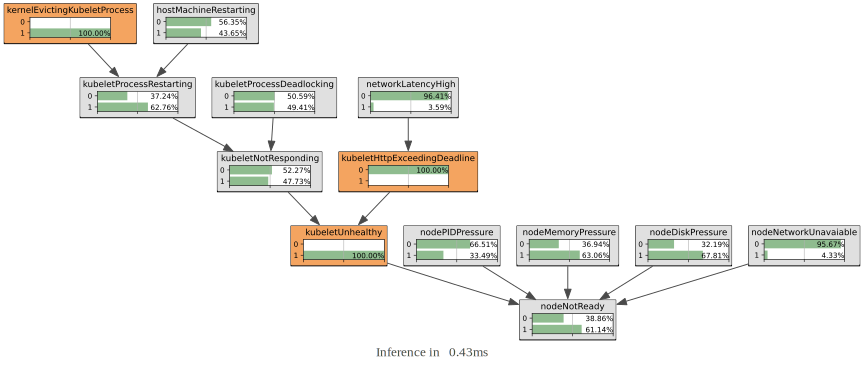

In [99]:
gnb.showInference(bn,evs={"kernelEvictingKubeletProcess":1,"kubeletHttpExceedingDeadline":0, "kubeletUnhealthy": 1},size="12")